In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("heart_2020_cleaned.csv")
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
data.shape

(319795, 18)

In [4]:
pd.DataFrame(data.isna().sum().sort_values(ascending=False), columns = ["NaN counts"])

,NaN counts
HeartDisease,0
BMI,0
KidneyDisease,0
Asthma,0
SleepTime,0
GenHealth,0
PhysicalActivity,0
Diabetic,0
Race,0
AgeCategory,0


In [5]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [6]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [7]:
data["GenHealth"].value_counts()

GenHealth
Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: count, dtype: int64

In [8]:
def var_encoding(df):
    df["Sex"] = df["Sex"].replace({"Female": 0, "Male": 1})
    df["GenHealth"] = df["GenHealth"].replace({"Poor": 0, "Fair": 1, "Good": 2, "Very good": 3, "Excellent": 4})
    df["AgeCategory"] = df["AgeCategory"].replace({"18-24": 1, "25-29": 2, "30-34": 3, "35-39": 1, "40-44": 2, "45-49": 3,
                                                   "50-54": 4, "55-59": 5, "60-64": 6, "65-69": 7, "70-74": 8, "75-79": 9,
                                                   "80 or older": 10})
    
    df['Diabetic'] = df['Diabetic'].map({'No': 0,'No, borderline diabetes': 1,'Yes (during pregnancy)': 2,'Yes': 3})
    df = df.replace({'Yes': 1,'No': 0})

    df = pd.get_dummies(df, columns=['Race'], dtype='int')
    return df

data = var_encoding(data)
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,16.60,1,0,0,3.0,30.0,0,0,5,...,5.0,1,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,10,...,7.0,0,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,7,...,8.0,1,0,0,0,0,0,0,0,1
3,0,24.21,0,0,0,0.0,0.0,0,0,9,...,6.0,0,0,1,0,0,0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,2,...,8.0,0,0,0,0,0,0,0,0,1


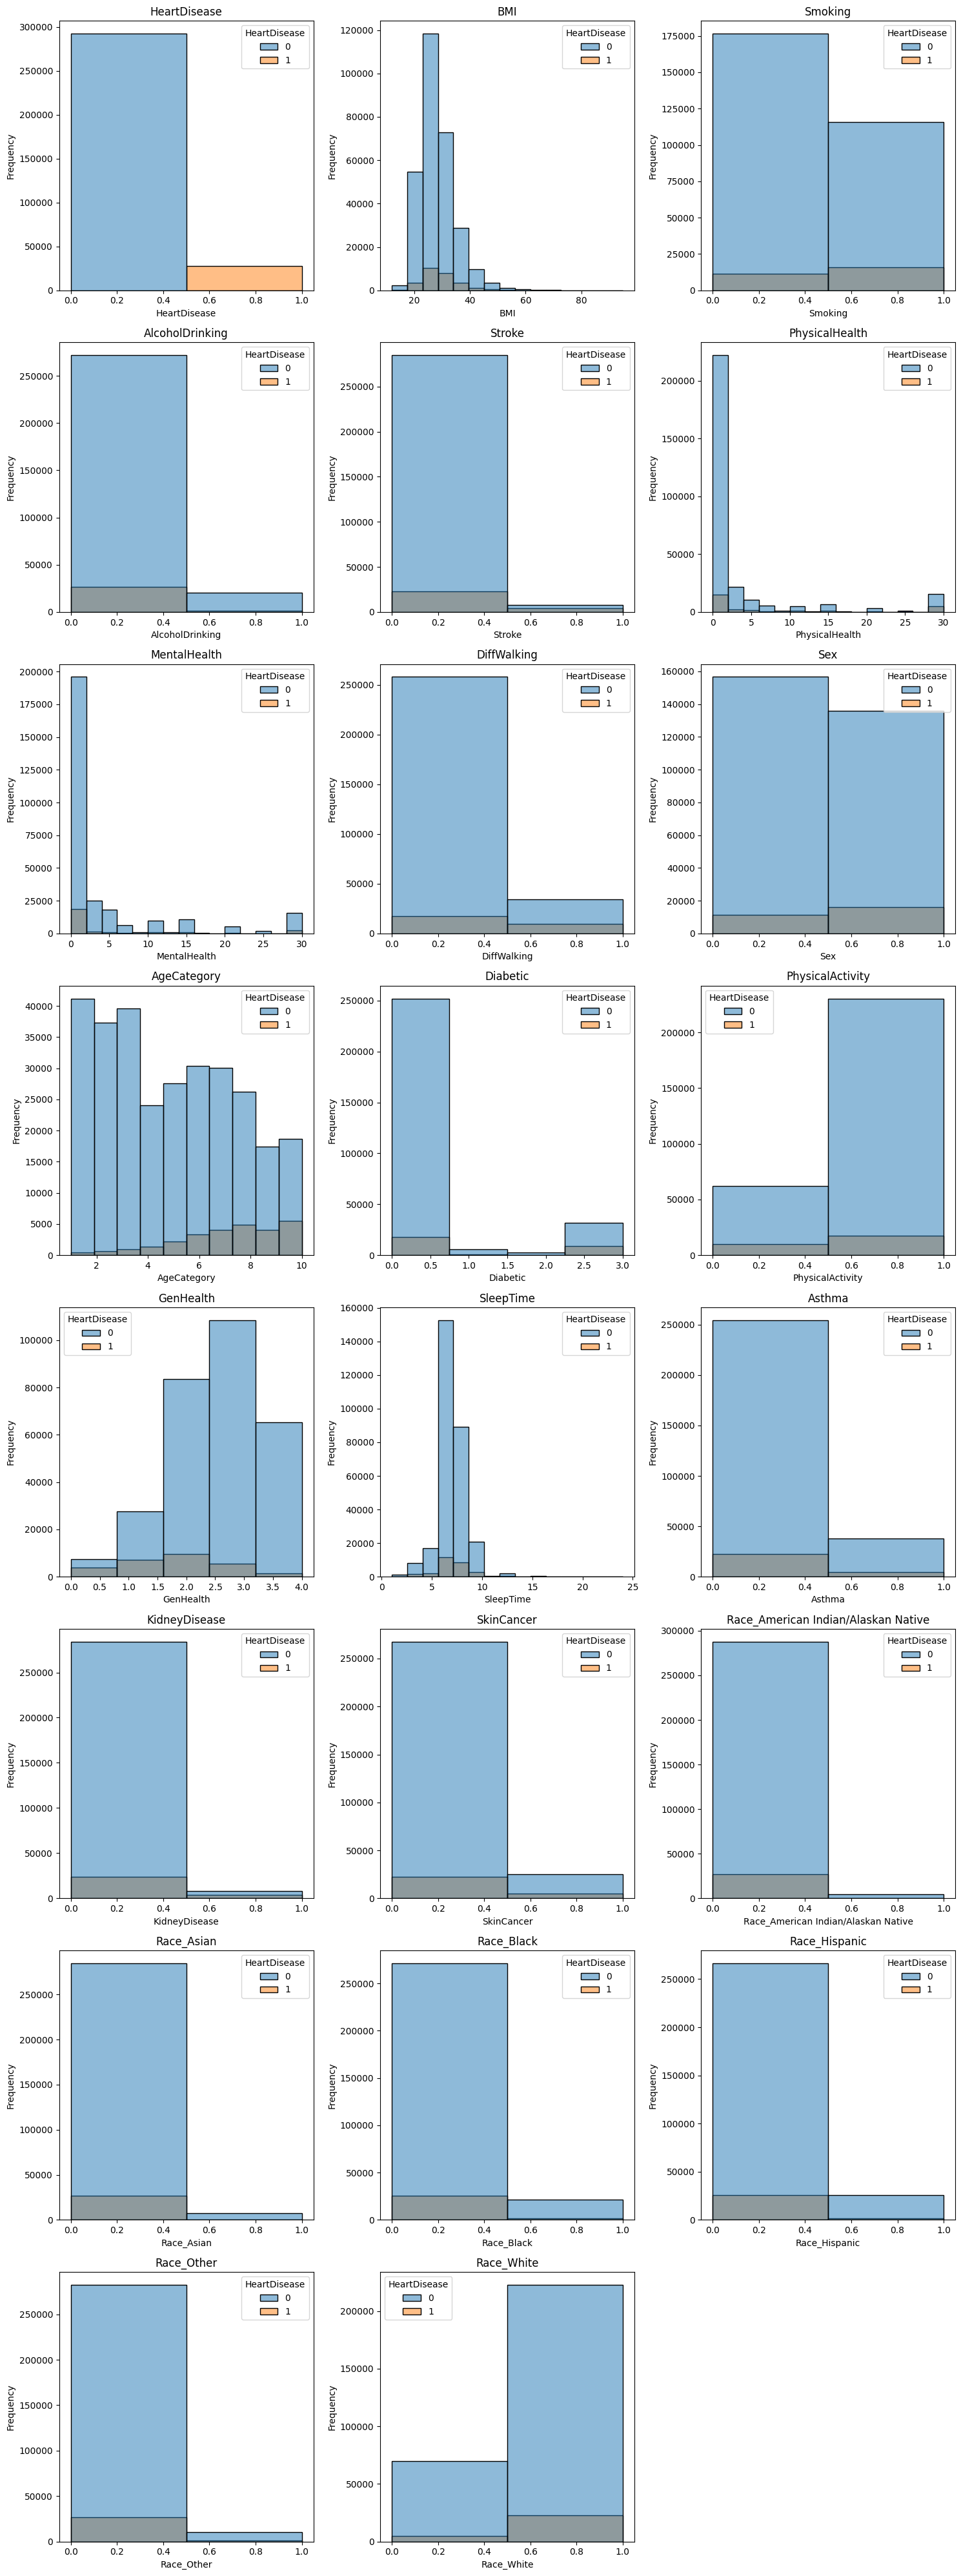

In [9]:
numerical_vars = data.select_dtypes(include='number').columns.tolist()
ncols = 3

# Calculate the number of rows needed based on the number of columns
nrows = -(-len(numerical_vars) // ncols)  # Ceiling division to get the number of rows

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the 2D array of subplots to a 1D array for easier indexing
axes = axes.flatten()

# Loop through variables and create histograms
for i, variable in enumerate(numerical_vars):
    ax = axes[i]
    bins = min([len(data[variable].value_counts()),15])
    sns.histplot(data = data, x = variable, ax=ax, bins = bins, hue = "HeartDisease", hue_order = [0,1])
    ax.set_title(variable)
    ax.set_xlabel(variable)
    ax.set_ylabel('Frequency')

# Remove empty subplots
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

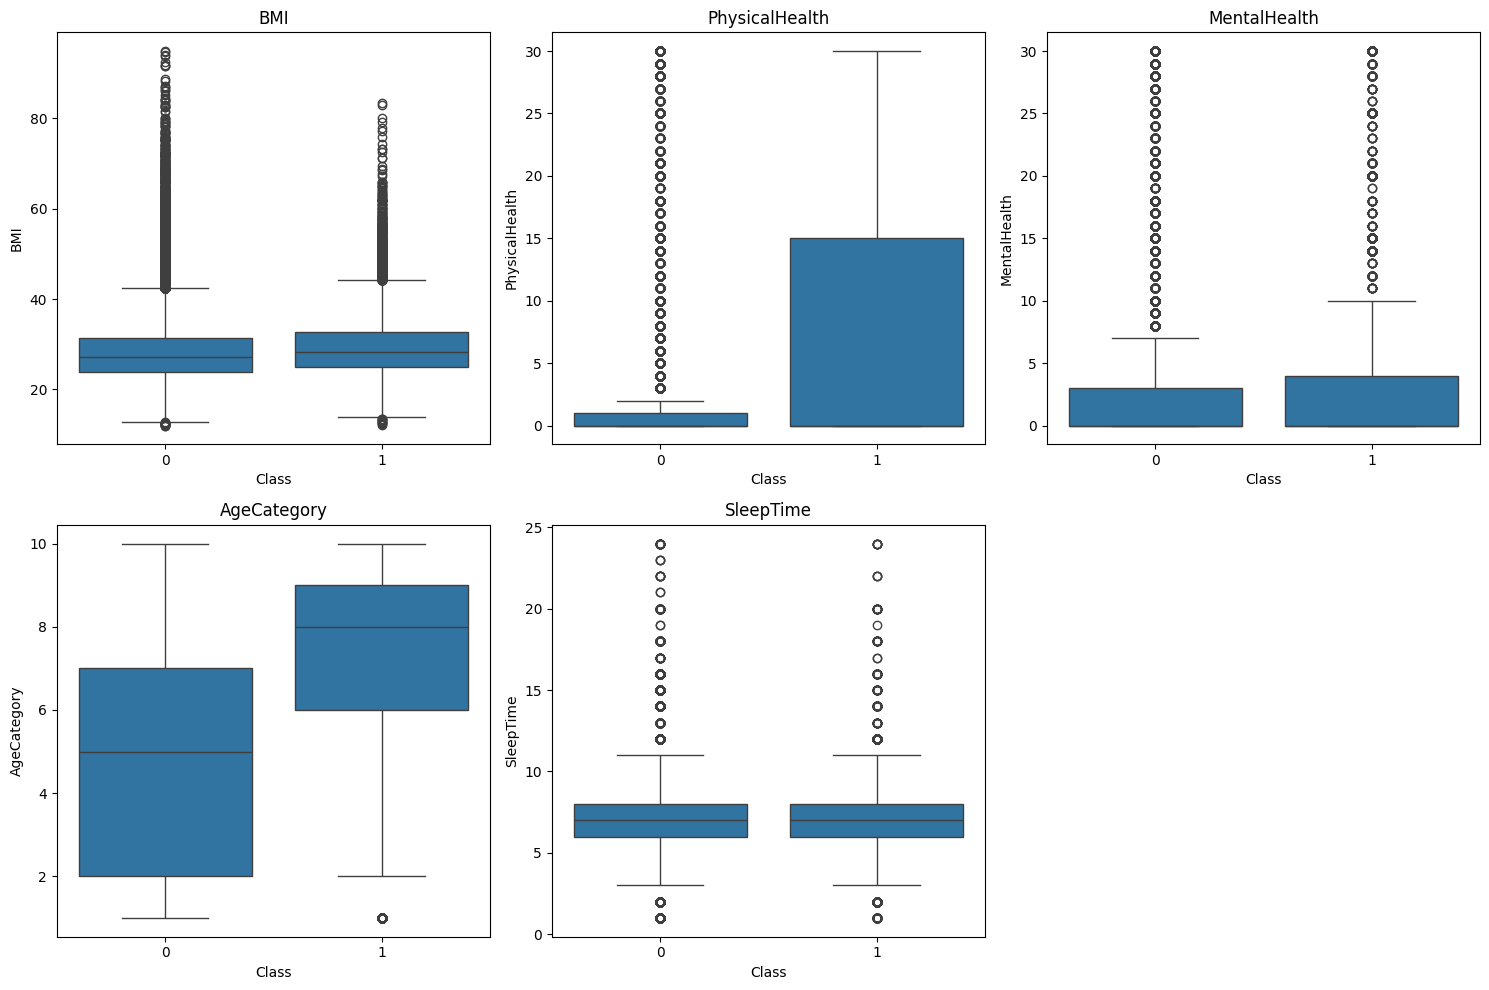

In [10]:
numerical_vars = [col for col in data.select_dtypes(include='number').columns if data[col].nunique() > 5]
ncols = 3

# Calculate the number of rows needed based on the number of columns
nrows = -(-len(numerical_vars) // ncols)  # Ceiling division to get the number of rows

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the 2D array of subplots to a 1D array for easier indexing
axes = axes.flatten()

# Loop through variables and create boxplots
for i, variable in enumerate(numerical_vars):
    ax = axes[i]
    sns.boxplot(data=data, x='HeartDisease', y=variable, ax=ax)  # Change to boxplot
    ax.set_title(variable)
    ax.set_xlabel('Class')
    ax.set_ylabel(variable)

# Remove empty subplots
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [11]:
data.dtypes

HeartDisease                             int64
BMI                                    float64
Smoking                                  int64
AlcoholDrinking                          int64
Stroke                                   int64
PhysicalHealth                         float64
MentalHealth                           float64
DiffWalking                              int64
Sex                                      int64
AgeCategory                              int64
Diabetic                                 int64
PhysicalActivity                         int64
GenHealth                                int64
SleepTime                              float64
Asthma                                   int64
KidneyDisease                            int64
SkinCancer                               int64
Race_American Indian/Alaskan Native      int64
Race_Asian                               int64
Race_Black                               int64
Race_Hispanic                            int64
Race_Other   

In [12]:
data.agg(['min', 'max'])

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
min,0,12.02,0,0,0,0.0,0.0,0,0,1,...,1.0,0,0,0,0,0,0,0,0,0
max,1,94.85,1,1,1,30.0,30.0,1,1,10,...,24.0,1,1,1,1,1,1,1,1,1


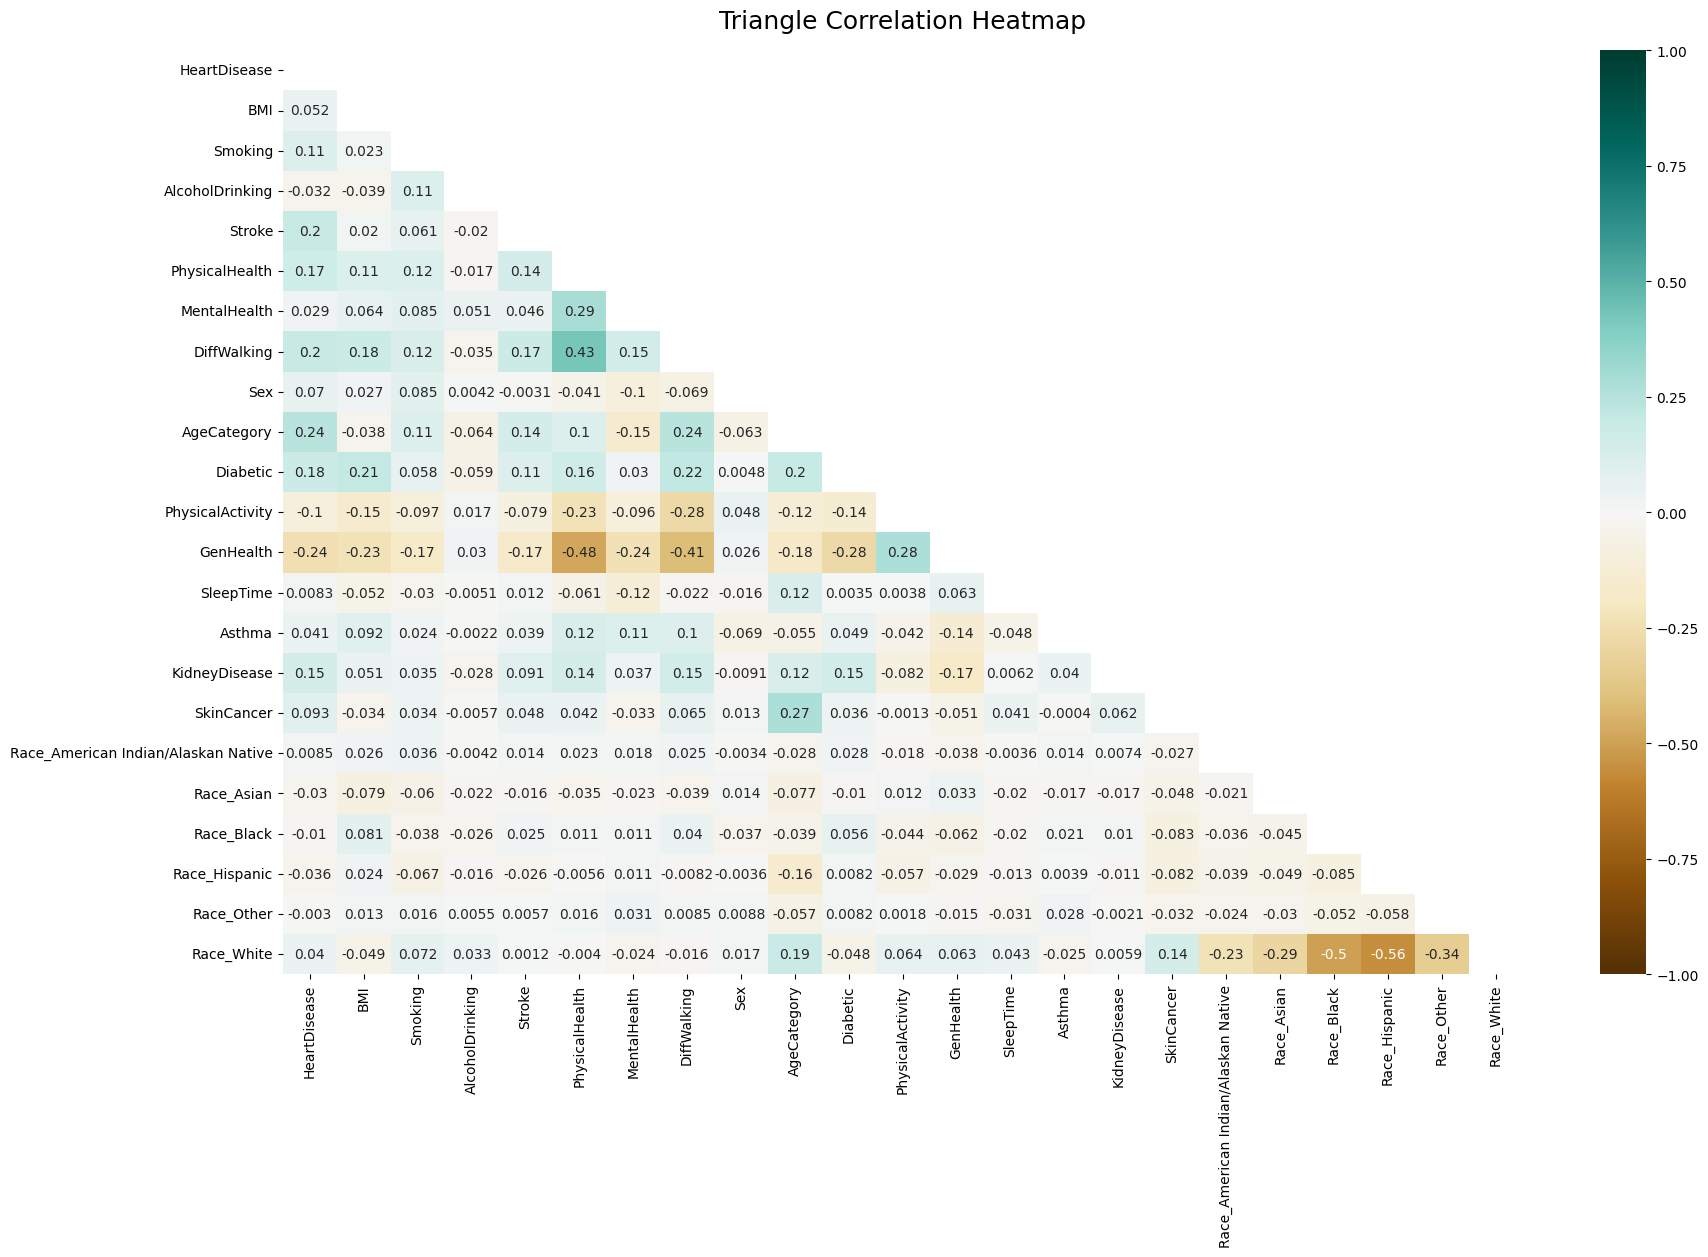

In [13]:
plt.figure(figsize=(20, 12))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool_))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.show()